<a href="https://colab.research.google.com/github/rohitgupta29/tensorflow/blob/main/Bank_Customer_Satisfaction_Prediction_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
!pip install tensorflow-gpu==2.0.0-rc0

In [96]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [97]:
from tensorflow.keras.layers import Conv1D,MaxPool1D,Flatten,Dropout,BatchNormalization,Dense
from tensorflow.keras.optimizers import Adam

In [98]:
print(tf.__version__)

2.0.0-rc0


In [99]:
!conda install matplotlib


/bin/bash: conda: command not found


In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold 

In [102]:
#Dataset Link https://github.com/laxmimerit/Data-Files-for-Feature-Selection
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

fatal: destination path 'Data-Files-for-Feature-Selection' already exists and is not an empty directory.


In [103]:
data = pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [104]:
data.shape

(76020, 371)

In [105]:
X = data.drop(labels = ["ID","TARGET"], axis = 1)
X.shape

(76020, 369)

In [106]:
y = data["TARGET"]

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y )
#stratify divides data symetrically according to y

In [108]:
X_train.shape, X_test.shape

((60816, 369), (15204, 369))

In [109]:
### Remove Constant, Quasi Constant and Duplicate Features

In [110]:
filter = VarianceThreshold(0.01) # If any column have variance less than 1%, it will be removed.
X_train = filter.fit_transform(X_train)
X_test = filter.transform(X_test) #we have to fit_transform on training dataset and transform on test set, otherwise our model is overfitting prone.

X_train.shape, X_test.shape

((60816, 273), (15204, 273))

In [111]:
# 116 features have been removed
389 - 273

116

In [112]:
# Now, lets remove duplicate features

X_train_T = X_train.T 
X_test_T = X_test.T


In [113]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [114]:
X_train_T.shape

(273, 60816)

In [115]:
X_train_T.duplicated().sum()

17

In [116]:
duplicated_features = X_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [117]:
features_to_keep = [not index for index in duplicated_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [118]:
X_train = X_train_T[features_to_keep].T
X_train.shape

(60816, 256)

In [119]:
X_test = X_test_T[features_to_keep].T
X_test.shape

(15204, 256)

In [120]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,39,41,...,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272
0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,55.74,0.00,60.0,57.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,15.00,4.83,15.0,11.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,90.00,40.68,90.0,73.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000


In [121]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
X_train

array([[ 3.80478472e-02, -5.56029626e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -1.83006062e-01],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  1.17499225e+00],
       ...,
       [ 3.80478472e-02,  5.99731758e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -2.41865113e-01],
       [ 3.80478472e-02, -1.70775831e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02,  2.91528722e-01,  7.65192053e+00, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03]])

In [123]:
X_train.shape, X_test.shape

((60816, 256), (15204, 256))

In [125]:
#reshaping data to fit on CNN
X_train = X_train.reshape(60816,256, 1)
X_test = X_test.reshape(15204, 256, 1)

In [126]:
X_train.shape, X_test.shape

((60816, 256, 1), (15204, 256, 1))

In [127]:
y_train

65503    0
39455    0
25121    0
73436    0
68392    0
        ..
61660    0
18800    0
33109    0
51120    0
73055    0
Name: TARGET, Length: 60816, dtype: int64

In [128]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [129]:
#Build CNN

In [130]:

model = Sequential()
model.add(Conv1D(32, 3, activation = 'relu', input_shape = (256, 1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3)) # 30 % neurons will be dropped while moving from 1st t0 2nd layer


model.add(Conv1D(64, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))


model.add(Conv1D(128, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid')) # as binary classification

In [131]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 254, 32)           128       
_________________________________________________________________
batch_normalization_5 (Batch (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 127, 32)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 127, 32)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_6 (Batch (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 62, 64)           

In [132]:
model.compile(optimizer = Adam(lr = 0.00005), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [133]:
history = model.fit(X_train,y_train, epochs = 10, validation_data = (X_test, y_test), verbose = 1)

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
60816/60816 [==============================] - 123s 2ms/sample - loss: 0.2341 - accuracy: 0.9497 - val_loss: 0.1961 - val_accuracy: 0.9603
Epoch 2/10
60816/60816 [==============================] - 121s 2ms/sample - loss: 0.1753 - accuracy: 0.9590 - val_loss: 0.1817 - val_accuracy: 0.9604
Epoch 3/10
60816/60816 [==============================] - 120s 2ms/sample - loss: 0.1699 - accuracy: 0.9603 - val_loss: 0.1808 - val_accuracy: 0.9605
Epoch 4/10
60816/60816 [==============================] - 121s 2ms/sample - loss: 0.1682 - accuracy: 0.9602 - val_loss: 0.1711 - val_accuracy: 0.9604
Epoch 5/10
60816/60816 [==============================] - 119s 2ms/sample - loss: 0.1633 - accuracy: 0.9604 - val_loss: 0.1706 - val_accuracy: 0.9604
Epoch 6/10
60816/60816 [==============================] - 119s 2ms/sample - loss: 0.1602 - accuracy: 0.960

In [135]:
history.history # its a dictionary for accuracy and loss for 1. train, 2. test

{'accuracy': [0.9497007,
  0.95899105,
  0.9602572,
  0.9602407,
  0.96037227,
  0.9603558,
  0.960438,
  0.9604216,
  0.960438,
  0.960438],
 'loss': [0.23408030973141192,
  0.1752859715718293,
  0.16985699917922142,
  0.16821296634708727,
  0.1632574630415587,
  0.16023384941895208,
  0.1583630634254686,
  0.1551045873750004,
  0.15391856234670626,
  0.15363532060821475],
 'val_accuracy': [0.9602736,
  0.9604052,
  0.9605367,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9604709,
  0.9604709],
 'val_loss': [0.19612140148697763,
  0.18166941157460087,
  0.18081605167835518,
  0.17108510310255173,
  0.17060505254774838,
  0.16124371403053508,
  0.16063029843685628,
  0.1594496006599361,
  0.1589252733162628,
  0.15779246903428654]}

In [137]:
def plot_learningCurve(history, epoch):
  #Plot training & validation accuracy values
  epoch_range = range(1,epoch + 1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy']) # validation set accuracy
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc = 'upper left')
  plt.show()

  # Plot training and validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc = 'upper left')
  plt.show()

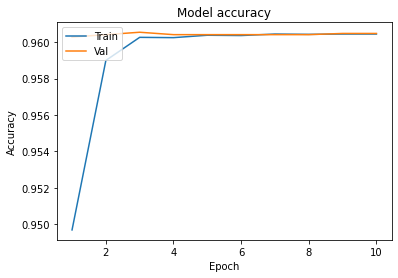

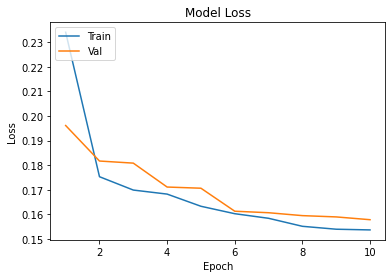

In [138]:
plot_learningCurve(history, 10)

In [ ]:
# This means that We have to train the data to around 4-5 epochs for good accuracy.

# New Section